# MFE 230P: ASSIGNMENT I
**YOUR STUDENT ID** \\ YOUR NAME \\ YOUR GROUP NAME

# 1. Convexity

### A. Convex Maximization

Some authors obtain the maximum eigenvalue of a positive semi-definite matrix $A\in\mathbb{R}^{n\times n}$ from the following optimization problem

$$\max_{x} x^\top A x \text{ subject to } \|x\|_2 = 1$$

while others instead write 

$$\max_{x} x^\top A x \text{ subject to } \|x\|_2 \leq 1$$

Despite the fact that the unit sphere $\{ x \mid \|x\|_2 = 1\}$ is a subset (more or less the shell) of the unit ball $\{x \mid \|x\|_2 \leq 1\}$, the two formulations are equivalent (meaning both problems produce the same minimizer) so long as $A \neq \mathbf{0}$. In fact, more generally, maximizing a convex function $f:\mathbb{R}^n \mapsto\mathbb{R}$ over any non-empty closed set $\mathcal{X} \subset \mathbb{R}^n$

$$\max_{x} f(x) \text{ subject to } x \in \mathcal{X}$$

is equivalent to maximizing $f$ over the [convex hull](https://en.wikipedia.org/wiki/Convex_hull) of $\mathcal{X}$

$$\max_{x} f(x) \text{ subject to } x \in \mathbf{conv}(\mathcal{X})$$

Prove that this claim is indeed true.

Utility maximization problems with convex preferences can be modeled as convex maximization programs, where the feasible region—defined by budget constraints—is often a [convex polytope](https://en.wikipedia.org/wiki/Convex_polytope). What does the above result suggest about where the optimal basket of goods will lie?

### SOLUTION.

_Your solution here._

### B. Transaction Cost Conventions

Transaction costs play a key role in designing successful trading strategies: If expected profits cannot be justified by their costs, then the investor should not transact. Each broker provides his/her own transaction cost to incentivise certain trading behavior. Below is a figure charting total transaction cost as a function of the number of shares purchased of a given stock:

<img src="transaction_costs.png">

Derive a mathematical expression that models each curve, explain whether or not the transaction costs are convex, and intutively rationalize what type of behavior the broker is encouraging by imposing these costs. What conclusion can you draw about the relationship between convex costs and diversification?

### SOLUTION.

_Your solution here._

**<font color='purple'>Purple.</font>**

**<font color='red'>Red.</font>**

**<font color='blue'>Blue.</font>**

**<font color='green'>Green.</font>**

# 2. Clustering

### A. $k$-Means Loss is decreasing in $k$

Recall that $k$-means clustering can be expressed as the following mathematical program

$$p^\star(k) = \min_{C_j} \sum_{j=1}^k \left\{ \frac{1}{\left|\Omega_j\right|} \sum_{i\in\Omega_j} \|x_i - C_j\|_2 \right\}$$

where $x_i\in\mathbb{R}^n$ is the $i^{th}$ example and $\Omega_j = \left\{i \mid \forall l\neq j: \|x_i - C_j\|_2 \leq \|x_i - C_l\|_2\right\}$. Show that $p^\star(k+1)\leq p^\star(k)$ for all $k \geq 1$. What are the qualitative implications of this result when applying clustering in practice?

### SOLUTION.

_Your solution here._

### B. Lloyd's Algorithm Implementation

Write a `Python` implementation of Lloyd's algorithm in a function `kmeans` using the template provided in the next cell below. You may not use any external packages to complete this problem aside from `numpy`.

### SOLUTION.

In [ ]:
import numpy as np

def kmeans(data, k = 2, total_iter=100):
    """
    data: An (n times p) numpy array with rows representing n observations of dimension p.
    k: An integer specifying the number of desired clusters.
    total_iter: The total number of iterations to perform.
    
    Outputs an array of length n containing cluster assignments.
    """

    # your implementation here
    
    return cluster_assignments

### C. Clusterpath Implementation

Write a `Python` implementation of $\ell_1$-clusterpath

$$\min_{\mu_i,\mu_j} \sum_{i=1}^n \| x_i - \mu_i \|_2^2 + \lambda \sum_{i<j} w_{ij} \|\mu_i - \mu_j\|_1$$

where $x_i$ is a row vector denoting the $i^{th}$ observation and $w_{ij} = \exp\left\{-\|x_i - x_j\|_2^2\right\}$. A template is provided in the next cell below. You may not use any external packages to complete this problem aside from `cvxpy`, `numpy`, and the function `enumerate_centroids` provided in the next cell. A list of `cvxpy` functions can be accessed [here](http://www.cvxpy.org/en/latest/tutorial/functions/).

Intuitively, what role do the fusion penalty weights $w_{ij}$ play in clusterpath? What do you expect to occur when $\forall i,j: w_{ij} = 1$? 

### SOLUTION.

In [ ]:
import cvxpy as cvx

def enumerate_centroids(centroids):
    """Given a n x p matrix of centroids outputted from cvxpy,
    where each of the n rows represents a centroid, will return
    an n x 1 array enumerating centroids."""

    unique = {} # stores unique centroids and numbers
    enumeration = [] # to store cluster number
    i = 0 # cluster number

    for row in np.round(centroids, 3):

        key = tuple(row)
        value = unique.get(key)

        if value is not None:
            enumeration.append(value)
        else:
            unique[key] = i # add cluster to dictionary
            enumeration.append(i)
            i += 1 # increment counter by one

    return np.array(enumeration)

def clusterpath(data, lamb=1, gamma=1):
    """
    data: An (n times p) numpy array with rows representing n 
    observations of dimension p.
    lamb: A positive number representing lambda in the clusterpath
    problem, which controls how harshly to penalize the fusion
    penalties.
    gamma: The bandwidth parameter of the exponentially-decaying weights.
    
    Outputs an array of length n containing cluster assignments.
    """

    # your implementation here
    
    return cluster_assignments

Having $w_{ij}$ be decreasing in $\|x_i - x_j\|$ means that the fusion penalty on centroids is larger if observations are close to each other and decays small quickly if they are farther apart. Intuitively, this means that fusing two far apart cluster centroids will not decrease the loss substantially, so clusterpath will instead focus on fusing clusters that are adjacent, per say. Focusing on adjancency means capturing local information, like forming clusters that may not necessarily be spherically-shaped. When $w_{ij} = 1$, the fusion penalties are insensitive to distance between observations and therefore will try to fuse the centroids of two points that may be arbitrarily far apart.

### D. Test Your Code

Now that you've created the `kmeans` and `clusterpath` functions, we will test them on some simulated data to make sure the results are consistent.

In [ ]:
X = np.vstack(
    (
        np.random.normal(loc=(2,2), size=(10,2)),
        np.random.normal(loc=(-2,-2), size=(10,2))
    )
)

which creates a $20 \times 2$ matrix where the first 10 rows are drawn iid from $\mathcal{N}\left((2,2),\mathbb{I}_2\right)$ and the last 10 are drawn iid from $\mathcal{N}\left((-2,-2),\mathbb{I}_2\right)$. If your implementation is successful and your parameters are set properly (e.g. $k =2$ in $k$-means), then your clustering function should roughly assign the first set of 10 observations to a different cluster than the second set of 10 observations. For example,

In [5]:
kmeans(X, k=2, total_iter=100)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

Now, simply execute the following cell and overwrite the provided figure; your results should be similar to the figures displayed below. If your figure looks like [dip-n-dots](http://bfy.tw/Bmxq), then something is wrong with your code.

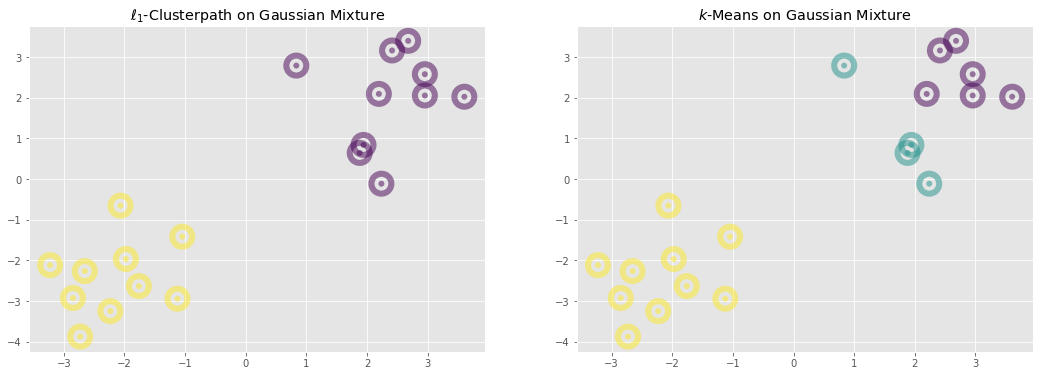

In [6]:
kmeans_assignments = kmeans(X, k=3, total_iter=100) # THIS WILL RUN YOUR KMEANS FUNCTION
clusterpath_assignments = clusterpath(X, lamb=50) # THIS WILL RUN YOUR CLUSTERPATH FUNCTION

########## The following code will plot your clusters. ####################################

from matplotlib import pyplot as plt
%matplotlib inline

x, y = zip(*X)

plt.style.use('ggplot')
plt.figure(figsize=(18,6))

plt.subplot(1,2,2)
plt.scatter(x, y, c=kmeans_assignments,
            linewidths=20, alpha=.5, marker='o')
plt.title(r'$k$-Means on Gaussian Mixture')

plt.subplot(1,2,1)
plt.scatter(x, y, c=clusterpath_assignments,
            linewidths=20, alpha=.5, marker='o')
plt.title(r'$\ell_1$-Clusterpath on Gaussian Mixture')

plt.show()

### E. Grouping Industries by Holdings

Executing the next cell below will download a dataset—a la [Professor Damodaran](http://www.stern.nyu.edu/faculty/bio/aswath-damodaran) of NYU Stern—containing insider and institutional holdings as a percent of outstanding stock, classified by industry. Our goal is to use clustering to understand which industries are similar to each other in terms of these holdings. This type of information is relevant to regulators looking to design laws aimed at particular industries based on these findings.

The holdings data will be stored in a variable `data`, a `pandas` dataframe object, which will contain the following columns:

- `total_num`: Total number of companies in each industry
- `ceo`: CEO holdings (percent)
- `institutional`: Intitutional holdings (percent)
- `insider`: Total insider holdings (percent)

Perform $k$-means clustering on the latter three variables for $k \in \{2,5,10\}$ and clusterpath for $\lambda \in \{2, 1, .5\}$ and $\gamma = .01$ using the functions you coded previously. For each pair $(k, \lambda)$ of hyper-parameters, plot each observation on a figure with x-axis representing `institutional` and y-axis representing `insider`, color-coding each industry by its respective cluster assignment, adjusting size to match `total_num`.

Note that since `data` is a table that contains non-numeric information, you will need to perform clustering only on the numerical portion of the table. (You may consider using [the `.as_matrix()` attribute](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.as_matrix.html)). Also, due to the size of the data and the genericness of `cvxpy`'s solution method, `clusterpath` will take several minutes to run.

In [ ]:
import pandas as pd

data = pd.read_csv( # this will read in the returns data as a csv
    '../../data/holdings.csv',
    index_col=0, header=0
)

data.head() # sample of dataset

### SOLUTION.

_Your solution here._

### F. Comment on Results

What differences do you notice between the way $k$-means and clusterpath group industries? How do these results change with the variations in $k$ and $\lambda$? Do some research on a few industries in each cluster: intuitively, do the groupings make sense?

### SOLUTION.

_Your solution here._

### G. $\ell_1$ distance metric

Suppose for both $k$-means and clusterpath, we replaced the $\ell_2$ norm for computing distance to clusters with the $\ell_1$ norm. Specifically, consider obtaining clusters by solving 

$$\min_{C_j} \sum_{j=1}^k \left\{ \frac{1}{\left|\Omega_j\right|} \sum_{i\in\Omega_j} \|x_i - C_j\|_1 \right\}$$

instead of $k$-means or 

$$\min_{\mu_i,\mu_j} \sum_{i=1}^n \| x_i - \mu_i \|_1 + \lambda \sum_{i<j} w_{ij} \|\mu_i - \mu_j\|_1$$

instead of clusterpath. Explain qualitatively how this would affect the way clusters were assigned in the previous excercise.

### SOLUTION.

_Your solution here._